In [34]:
import seaborn as sns
import pandas as pd
from sklearn import __version__ as sklversion

In [35]:
rfr = pd.read_csv("rf_results.csv")

In [36]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ndims             540 non-null    int64  
 1   mode              540 non-null    object 
 2   dist_sigma        540 non-null    float64
 3   nsamples          540 non-null    int64  
 4   c2st_score        540 non-null    float64
 5   crossvalid        540 non-null    int64  
 6   total_cvtime_sec  540 non-null    float64
 7   nfolds            540 non-null    int64  
 8   sklearn_version   540 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 38.1+ KB


In [37]:
nnr = pd.read_csv("nn_results.csv")
nnr['mode'] = "mlp"

In [38]:
nnr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ndims             540 non-null    int64  
 1   mode              540 non-null    object 
 2   dist_sigma        540 non-null    float64
 3   nsamples          540 non-null    int64  
 4   c2st_score        540 non-null    float64
 5   crossvalid        540 non-null    int64  
 6   total_cvtime_sec  540 non-null    float64
 7   nfolds            540 non-null    int64  
 8   sklearn_version   540 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 38.1+ KB


In [39]:
enr = pd.read_csv("early_results.csv")
enr['mode'] = "mlp_early"
enr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ndims             540 non-null    int64  
 1   mode              540 non-null    object 
 2   dist_sigma        540 non-null    float64
 3   nsamples          540 non-null    int64  
 4   c2st_score        540 non-null    float64
 5   crossvalid        540 non-null    int64  
 6   total_cvtime_sec  540 non-null    float64
 7   nfolds            540 non-null    int64  
 8   sklearn_version   540 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 38.1+ KB


In [40]:
df = pd.concat([ rfr, nnr, enr ], ignore_index=True)

In [41]:
df = df.astype({"mode":"category"})

In [42]:
print(df.info())
df['mode'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ndims             1620 non-null   int64   
 1   mode              1620 non-null   category
 2   dist_sigma        1620 non-null   float64 
 3   nsamples          1620 non-null   int64   
 4   c2st_score        1620 non-null   float64 
 5   crossvalid        1620 non-null   int64   
 6   total_cvtime_sec  1620 non-null   float64 
 7   nfolds            1620 non-null   int64   
 8   sklearn_version   1620 non-null   object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 103.1+ KB
None


mlp          540
mlp_early    540
rf           540
Name: mode, dtype: int64

In [43]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
common_palette = sns.dark_palette("blue", n_colors=len(df.nsamples.unique()))

## test set accuracy versus distance of ensembles and data set size

First, we study the behaviour of the average test set accuracy returned by `c2st` versus the dataset size and the distance between two samples in units of standard deviations. In this dataset, two multivatiate normal distributions were samples with variance of 1 and dimensionality of 10 (see the `ndims` column of `df`). Each ensemble yields `nsamples` number of samples. 

For, `dist_sigma = 0.` both ensembles _P_ and _Q_ originate from the same multivariate PDF. For `dist_sigma = 1.25`, the mean values of _P_ are located at `mu_P = 0` and of _Q_ at `mu_Q = 1.25`. For `dist_sigma = 2.`, the mean values of _P_ are located at `mu_P = 0` and of _Q_ at `mu_Q = 2.`.

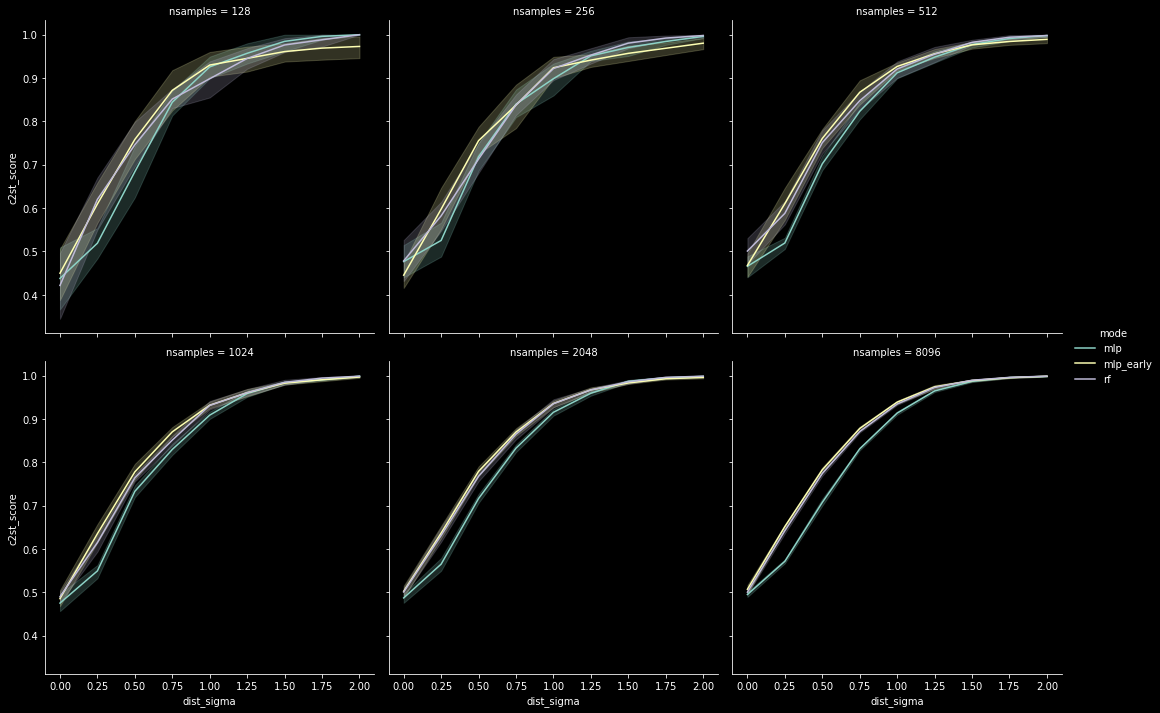

In [44]:
g = sns.relplot(data=df, x="dist_sigma", y="c2st_score", hue="mode", col="nsamples", kind="line", col_wrap=3)

From the plots above, we see that with increasing dataset size `nsamples` of _P_ and _Q_, the outputs of the both tests become more smooth. This confirms expectations, that classifyiers return more robust predictions with larger datasets. In all but the smallest `nsamples` case, the random forest `rf` based `c2st` invocation returns higher accuracy values. Without an uncertainty analysis of this, it hard to make a conclusive judgement on this observation.

We can also see, that with decreasing `nsamples` accuracy values start to become more divergent. As an exemplary point of interest, `dist_sigma = 0.` can serve as an hint to quantify the possibility false positive conclusions. Only in the small samples size of `128` samples of _P_ and _Q_ each, a considerable deviation from the expected value of 0.5 can be observed. In this scenario, again, an uncertainty estimate could help to make more concrete inferences from this observation.

The uncertainty bands visible are computed from test set accuracy values obtained from 10-fold cross validation. With increasing sample size `nsamples`, the uncertainties decrease. For all sample sizes, the reported values of the randomforest based `c2st` and the `c2st` using a multi-layer perceptron (MLP) with early stopping overlap. However, for `nsamples>512`, the plain neural net which trains for 1000 epochs apparently reports accuracies below those reported by `rf` and `mlp_early` variants. As this behavior establishes outside uncertainty bands and for ensemble distances `dist_sigma < 1.25`, it results into over-conservative judgements being made if the plain `mlp` scores would be used only. 

In [45]:
g.savefig("c2stscore_vs_distance.png")

## `c2st` runtimes

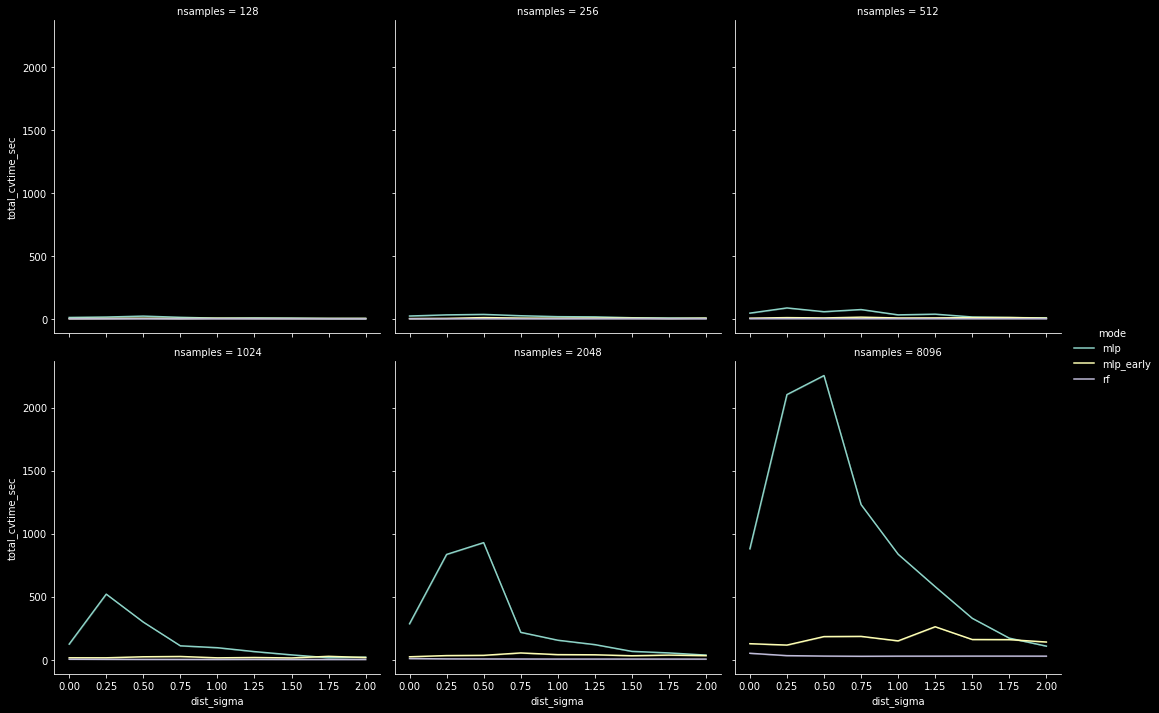

In [46]:
g = sns.relplot(data=df, x="dist_sigma", y="total_cvtime_sec", hue="mode", col="nsamples", kind="line", col_wrap=3)

In [47]:
g.savefig("time_vs_distance.png")

The plots above report the full cross validation runtime of `c2st` from 10 folds with varying sample sizes `nsamples`, ensemble distances `dist_sigma` and classifier architectures `mode`. Three types of classifiers are used:
- a neural networt of 2 hidden layers with `10*ndim` neurons was trained (`mlp`), 
- the same mlp with early stopping of 50 epochs (`mlp_early`) or 
- a random forest (using `skleanr`s default parameters) was used.

The following observations can be made:
- with increasing dataset size, the average runtime of `mlp` is far higher than of the `rf` variant
- especially in the low `dst_sigma` regime, the `mlp` exposes much higher training times (which is expected as the 2 ensembles become more and more undistinguishable)
- the maximum runtime ratio between `rf` and `mlp` can be as high as 43x 
- the maximum runtime ratio between `rf` and `mlp_early` can be as high as 5x 

In [49]:
nnr.total_cvtime_sec.max()/rfr.total_cvtime_sec.max()

43.48592272952605

In [50]:
enr.total_cvtime_sec.max()/rfr.total_cvtime_sec.max()

5.056871723098385

## Bottom Line

For the dataset used here, `c2st` using a randomforest is the fastest algorithm at smaller runtimes than using an early-stopping based MLP or a plain MLP.